# Hand Written Digit Recognition using Neural Networks

## Importing Essential Libs

In [4]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import warnings
warnings.filterwarnings('ignore')

## Loading and Inspecting the Dataset

In [5]:
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train.shape, y_train.shape

((60000, 28, 28), (60000,))

## Normalizing the x_train and x_test (Input values) to a scale factor of 0-1

In [7]:
def normalize(data):
    return tf.keras.utils.normalize(data, axis=1)

x_train = normalize(x_train)
x_test = normalize(x_test)

In [8]:
imgSize = 28
x_train = np.array(x_train).reshape(-1, imgSize, imgSize, 1)
x_test = np.array(x_test).reshape(-1, imgSize, imgSize, 1)
print(x_train.shape, x_test.shape)

(60000, 28, 28, 1) (10000, 28, 28, 1)


In [9]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Flatten, Conv2D, MaxPool2D

In [10]:
model = Sequential()

#### First Convolution layer 0 1 2 3 (60000, 28, 28, 1) 28-3+1 = 26x26
model.add(Conv2D(64, (3,3), input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPool2D(pool_size=(2,2)))

#### Second Convolution layer 0 1 2 3 (60000, 28, 28, 1) 28-3+1 = 26x26
model.add(Conv2D(64, (3,3), input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPool2D(pool_size=(2,2)))

#### Third Convolution layer 0 1 2 3 (60000, 28, 28, 1) 28-3+1 = 26x26
model.add(Conv2D(64, (3,3), input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPool2D(pool_size=(2,2)))

#### Fully Connected layer 0 1 2 3 (60000, 28, 28, 1) 28-3+1 = 26x26
model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))

#### Last fully connected layer
model.add(Dense(10))
model.add(Activation('softmax'))



In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 64)        640       
_________________________________________________________________
activation (Activation)      (None, 26, 26, 64)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        36928     
_________________________________________________________________
activation_1 (Activation)    (None, 11, 11, 64)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 64)          3

In [17]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [18]:
# Training the model against x_train and y_train
model.fit(x_train, y_train, epochs=5, validation_split=0.3)

Epoch 1/5
1313/1313 [==============================] - 40s 30ms/step - loss: 0.3126 - accuracy: 0.9024 - val_loss: 0.1179 - val_accuracy: 0.9629
Epoch 2/5
1313/1313 [==============================] - 40s 30ms/step - loss: 0.1042 - accuracy: 0.9688 - val_loss: 0.0967 - val_accuracy: 0.9703
Epoch 3/5
1313/1313 [==============================] - 40s 30ms/step - loss: 0.0726 - accuracy: 0.9775 - val_loss: 0.0823 - val_accuracy: 0.9748
Epoch 4/5
1313/1313 [==============================] - 41s 31ms/step - loss: 0.0571 - accuracy: 0.9825 - val_loss: 0.0718 - val_accuracy: 0.9773
Epoch 5/5
1313/1313 [==============================] - 40s 30ms/step - loss: 0.0457 - accuracy: 0.9858 - val_loss: 0.0762 - val_accuracy: 0.9769


In [19]:
model.save('handWrittenDigits.model')

INFO:tensorflow:Assets written to: handWrittenDigits.model\assets


In [20]:
# model.save('handWrittenDigits.model')
# model = tf.keras.models.load_model('handWrittenDigits.model')
loss, accuracy = model.evaluate(x_test, y_test)

313/313 [==============================] - 2s 7ms/step - loss: 0.0707 - accuracy: 0.9783


In [21]:
print(loss, accuracy)

0.07074078917503357 0.9782999753952026


In [23]:
predictions = model.predict([x_test])




 -----------------------------------------: Prediction : 0 :----------------------------------------- 



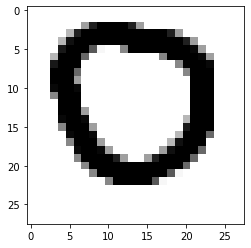




 -----------------------------------------: Prediction : 1 :----------------------------------------- 



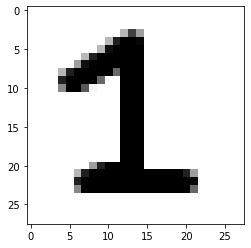




 -----------------------------------------: Prediction : 2 :----------------------------------------- 



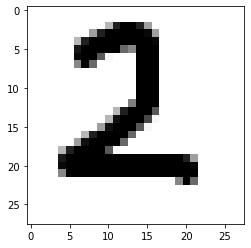




 -----------------------------------------: Prediction : 3 :----------------------------------------- 



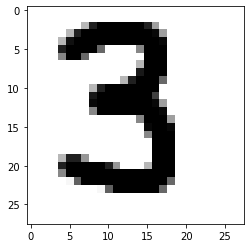




 -----------------------------------------: Prediction : 4 :----------------------------------------- 



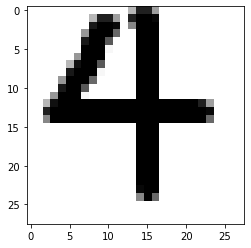




 -----------------------------------------: Prediction : 6 :----------------------------------------- 



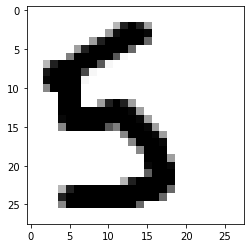




 -----------------------------------------: Prediction : 6 :----------------------------------------- 



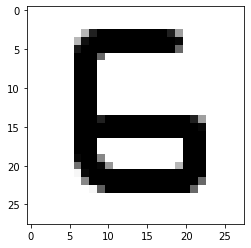




 -----------------------------------------: Prediction : 1 :----------------------------------------- 



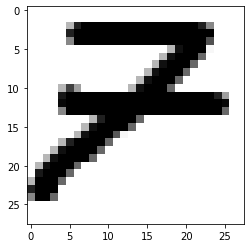




 -----------------------------------------: Prediction : 8 :----------------------------------------- 



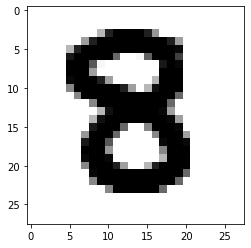




 -----------------------------------------: Prediction : 4 :----------------------------------------- 



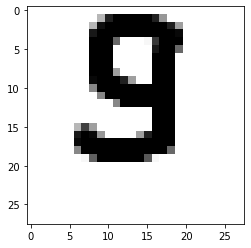

done


In [24]:
import os
imgNo = 0
# print(os.listdir(f'./images'))
while os.path.isfile(f"./images/{imgNo}.png"):
    # try:
    img = cv.imread(f"./images/{imgNo}.png")[:,:,0]
    # gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
    img = cv.resize(img, (imgSize, imgSize), interpolation=cv.INTER_AREA)
    imgN = tf.keras.utils.normalize(img, axis=1)
    imgR = np.array(imgN).reshape(-1, imgSize, imgSize, 1)
    prediction = model.predict(imgR)
    print('\n\n\n', f': Prediction : {np.argmax(prediction)} :'.center(100, '-'), '\n')
    plt.imshow(img, cmap=plt.cm.binary)
    plt.show()
    imgNo += 1
    # except Exception: print('Error!')
print('done')